In [0]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


1. The Bootstrap and The Normal Curve
In this exercise, we will explore a dataset that includes the safety inspection scores for restaurants in the city of Austin, Texas. We will be interested in determining the average restaurant score for the city from a random sample of the scores; the average restaurant score is out of 100. We'll compare two methods for computing a confidence interval for that quantity: the bootstrap resampling method, and an approximation based on the Central Limit Theorem.

In [2]:
# Just run this cell.
#Load data into a pandas dataframe
dirpath = "https://raw.githubusercontent.com/data-8/materials-su19/master/materials/su19/hw/hw10/"
pop_restaurants = Table.read_table(dirpath+'restaurant_inspection_scores.csv').drop('Facility ID','Process Description')
pop_restaurants

Restaurant Name,Zip Code,Inspection Date,Score,Address
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652"
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"


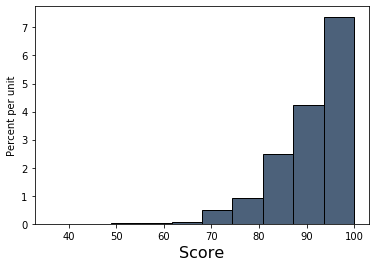

In [3]:

pop_restaurants.hist('Score')

In [4]:
pop_mean = np.mean(pop_restaurants.column('Score'))
pop_mean

91.40706693478886

In [5]:
restaurant_sample = pop_restaurants.sample(100, with_replacement=False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address
Stubb's,78701,11/09/2015,93,"801 RED RIVER ST AUSTIN, TX 78701 (30.268687, -97.736382)"
The Volstead Lounge,78702,06/25/2015,90,"1500 E 6TH ST AUSTIN, TX 78702 (30.263303, -97.727285)"
Simon's Cafe @ ACC,78736,04/24/2014,85,"7748 W US 290 HWY AUSTIN, TX 78736 (30.229242, -97.882967)"
C-Hunt's Ice House,78758,10/12/2016,97,"9611 MC NEIL RD AUSTIN, TX 78758 (30.378013, -97.723962)"
CJC Snack Bar,78701,08/21/2014,95,"509 W 11TH ST AUSTIN, TX 78701 (30.274242, -97.746495)"
Con'olio Oils & Vinegars,78759,04/07/2016,99,"10000 RESEARCH BLVD SB Unit 130 AUSTIN, TX 78759 (30.392 ..."
China House Restaurant,78758,05/22/2014,77,"9505 BURNET RD AUSTIN, TX 78758 (30.378754, -97.725178)"
Polvo's Restaurant & Bar,78704,05/01/2015,70,"2004 S 1ST ST AUSTIN, TX 78704 (30.2451, -97.757298)"
Baranoff Elem School,78748,12/19/2013,97,"12009 BUCKINGHAM GATE RD AUSTIN, TX 78748 (30.153176, -9 ..."
Boulevards Grill & Bar,78731,01/12/2016,97,"3616 FAR WEST BLVD AUSTIN, TX 78731 (30.354673, -97.755667)"


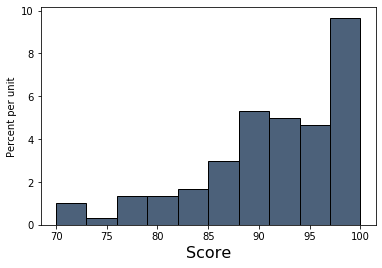

In [6]:
restaurant_sample.hist('Score')

In [7]:
sample_mean = np.mean(restaurant_sample.column('Score'))
sample_mean

90.99

Question 1
Complete the function one_resampled_mean below. It should take in an original table data, with a column Score, and return the mean score of one resampling from data.

Remember to call your function and check the output before moving on to autograder tests.

In [8]:
def one_resampled_mean(data):
    resampled_data = data.sample()
    return np.mean(resampled_data.column('Score'))
# Visualize one call of your function:
this_mean = one_resampled_mean(pop_restaurants)
print(this_mean)

91.36356547790044


Question 2
Complete the function bootstrap_scores below. It should take no arguments. It should simulate drawing 5000 resamples from restaurant_sample and compute the mean restaurant score in each resample. It should return an array of those 5000 resample means.

In [18]:
def bootstrap_scores():
    resampled_means = make_array()
    for i in range(5000):
        resampled_mean = one_resampled_mean(restaurant_sample)
        resampled_means = np.append(resampled_means,resampled_mean)
    return resampled_means

resampled_means = bootstrap_scores()
resampled_means

array([90.51, 89.65, 90.39, ..., 90.91, 90.57, 91.63])

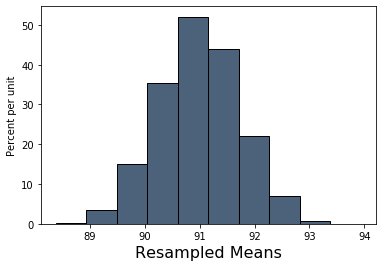

In [19]:
Table().with_column('Resampled Means', resampled_means).hist()


Question 3
Compute a 95 percent confidence interval for the average restaurant score using the array resampled_means.

In [20]:
lower_bound = percentile(2.5, resampled_means)
upper_bound = percentile(97.5, resampled_means)
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping:
( 89.54 , 92.45 )



Question 4
What distribution is the histogram between question 2 and 3 displaying (that is, what data are plotted), and why does it have that shape?

**restaurant_sample is just a random sample which is just one of numerous possible random samples, and thus an estimate from that data is just one of numerous plausible estimates. To understand the variability of all those random sample means, we use bootstrap which generates new random samples by a method called resampling: the new samples are drawn at random from the original sample.And in question two all these resampled means are calculated and plotted in a histogram to give us an idea about the varablilty of sample means of the different samples drawn from a population, but using only a single sample. We are doing resampling 5000 times as the law of large numbers state that when an experiment is repeated large number of times the estimate will be close to the real value. And when the sample is large enough theis real value will be close to population parameter.

The distribution of the means looks much closer to a normal distribution. This resemblance increases as the number of resamples increases. With 1,000 resamples, the distribution of the mean of the resamples is approximately normal.The central limit theorem is a fundamental theorem of probability and statistics. The theorem states that the distribution of the mean of a random sample from a population with finite variance is approximately normally distributed when the sample size is large, regardless of the shape of the population's distribution.

Question 5
Does the distribution of the sampled scores look normally distributed? State "yes" or "no" and describe in one sentence why you should expect this result.

Hint: Remember that we are no longer talking about the resampled means!

The distribution of the means looks much closer to a normal distribution. This resemblance increases as the number of resamples increases. With 1,000 resamples, the distribution of the mean of the resamples is approximately normal.The central limit theorem is a fundamental theorem of probability and statistics. The theorem states that the distribution of the mean of a random sample from a population with finite variance is approximately normally distributed when the sample size is large, regardless of the shape of the population's distribution.

This is based on two facts:

If a group of numbers has a normal distribution, around 95% of them lie within 2 standard deviations of their mean.
The Central Limit Theorem tells us the quantitative relationship between the following:
the standard deviation of an array of numbers.
the standard deviation of an array of means of samples taken from those numbers.
Also recall the standard deviation of sample means:
$\texttt{sd of sample means from many samples from a distribution}  =   $$\frac{\texttt{sd of the original distribution}}{\sqrt{\texttt{sample size}}}$$ $

So bootsraping does this in reverse order. it takes a sample , try to imitate a population from that sample, verify if it has a normal distribution to make inference about the population parameter.

Question 6
Without referencing the array resampled_means or performing any new simulations, calculate an interval around the sample_mean that covers approximately 95% of the numbers in the resampled_means array. You may use the following values to compute your result, but you should not perform additional resampling - think about how you can use the CLT to accomplish this.

In [21]:

sample_mean = np.mean(restaurant_sample.column('Score'))
sample_sd = np.std(restaurant_sample.column('Score'))
sample_size = restaurant_sample.num_rows

sd_of_means = np.std(pop_restaurants.column('Score'))/np.sqrt(sample_size)
lower_bound_normal = sample_mean - 2*sd_of_means
upper_bound_normal = sample_mean + 2*sd_of_means
print("95% confidence interval for the average restaurant score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average restaurant score, computed by a normal approximation:
( 89.45618327076103 , 92.52381672923896 )



2. Testing the Central Limit Theorem
To recap the properties we just saw: The Central Limit Theorem tells us that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.

That's a pretty big claim, but the theorem doesn't stop there. It further states that the standard deviation of this normal distribution is given by

$$\frac{\texttt{sd of the original distribution}}{\sqrt{\texttt{sample size}}}$$
In other words, suppose we start with any distribution that has standard deviation $x$, take a sample of size $n$ (where $n$ is a large number) from that distribution with replacement, and compute the mean of that sample. If we repeat this procedure many times, then those sample means will have a normal distribution with standard deviation $\frac{x}{\sqrt{n}}$.

That's an even bigger claim than the first one! The proof of the theorem is beyond the scope of this class, but in this exercise, we will be exploring some data to see the CLT in action.

Question 1. Define the function one_statistic_prop_heads which should return exactly one simulated statistic of the proportion of heads from $n$ coin flips.

In [0]:

coin_proportions = make_array(.5, .5) # our coin is fair

def one_statistic_prop_heads(n):
    simulated_proportions = sample_proportions(n, coin_proportions)
    prop_heads = simulated_proportions.item(0)
    return prop_heads


Question 2. The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement. Is 10 large? How about 50? The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as sample size goes up.

Consider a coin flip. If we say Heads is $1$ and Tails is $0$, then there's a 50% chance of getting a 1 and a 50% chance of getting a 0, which definitely doesn't match our definition of a normal distribution. The average of several coin tosses, where Heads is 1 and Tails is 0, is equal to the proportion of heads in those coin tosses (which is equivalent to the mean value of the coin tosses), so the CLT should hold true if we compute the sample proportion of heads many times.

Write a function called sample_size_n that takes in a sample size $n$. It should return an array that contains 5000 sample proportions of heads, each from $n$ coin flips.

In [23]:

def sample_size_n(n):
    coin_proportions = make_array(.5, .5) # our coin is fair
    heads_proportions = make_array()
    for i in np.arange(5000):
        prop_heads = sample_proportions(n, coin_proportions)
        heads_proportions = np.append(heads_proportions,prop_heads)
    return heads_proportions

sample_size_n(50)

array([0.5 , 0.5 , 0.48, ..., 0.52, 0.54, 0.46])

In [24]:
#Load dataset for flights data
dirpath1="https://raw.githubusercontent.com/data-8/materials-su19/master/materials/su19/hw/hw10/"
united = Table.read_table(dirpath1+'united_summer2015.csv')
united_std = np.std(united.column('Delay'))
united_std

39.480199851609314

Question 2.3: Write a function called empirical_sample_mean_sd that takes a sample size n as its argument. The function should simulate 500 samples with replacement of size n from the flight delays dataset, and it should return the standard deviation of the means of those 500 samples.

Hint: This function will be similar to the sample_size_n function you wrote earlier.

In [25]:
def empirical_sample_mean_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = united.sample(n,with_replacement=True).column('Delay')
        sample_mean = np.mean(sample)
        sample_means = np.append(sample_means,sample_mean)
    return np.std(sample_means)

empirical_sample_mean_sd(10)

12.482862330411242


Question 2.4: Now, write a function called predict_sample_mean_sd to find the predicted value of the standard deviation of means according to the relationship between the standard deviation of the sample mean and sample size that is discussed here in the textbook. It takes a sample size n (a number) as its argument. It returns the predicted value of the standard deviation of the mean delay time for samples of size n from the flight delays (represented in the table united).

In [26]:
def predict_sample_mean_sd(n):
    return united_std/np.sqrt(n)

predict_sample_mean_sd(10)

12.484735400972708